## 신경망

가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 있다.

#### 3.1.1 신경망의 예
- 가장 왼쪽 줄을 입력층, 맨 오른쪽 줄을 출력층, 중간 줄을 은닉층 
- 은닉층의 뉴런은 사람 눈에는 보이지 않는다.
- 입력층에서 출력층 방향으로 차례로 0층, 1층, 2층이라 한다.
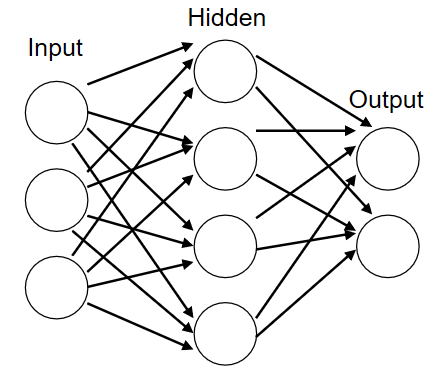

#### 3.1.2 퍼셉트론 복습
- 아래 그림은 x1, x2 라는 두 신호를 입력받아 y를 출력하는 퍼셉트론, 및 수식
- b는 편향을 나타내는 매개변수이고 뉴런이 얼마나 쉽게 활성화되느냐를 제어
- w1, w2는 각 신호의 가중치를 나타내는 매개변수, 신호의 영향력을 제어
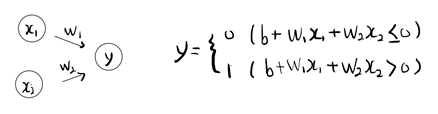

- 위 그림에는 편향 b가 보이지 않는다. 편향을 표시한다면 아래 그림과 같다.

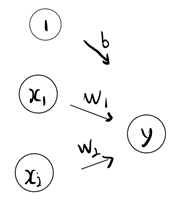

- 이 퍼셉트론의 동장은 x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후 다음 뉴런에 전달된다.
- 합이 0이 넘으면 1, 그렇지 않으면 0을 출력한다.
- 함수를 다시 나타내면 아래와 같은 식으로 다시 나타낼 수 있다.
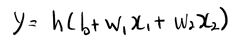

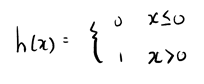

#### 3.1.3 활성화 함수의 등장
입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수라 한다. **활성화**라는 이름이 말해주듯 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.
- 위 식을 다시 이해해 보면 아래 식처럼 나타낼 수 있다.
- a식에서 가중치가 곱해진 입력 신호의 총합을 계산한다.
- 그 합을 활성화 함수 h를 통해 결과를 내는 2단계로 처리한다.
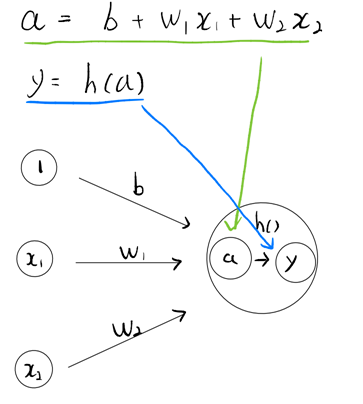

- 위 그림에서 뉴런에 원을 키워 그 안에 활성화 함수의 처리 과정을 명시적으로 넣어 **입력 신호와 가중치 신호를 조합하여 결과가 a라는 노드가 되고 활성화 함수 h()를 통해 변환하는 과정이 분명하게 나타나 있다.**
- 뉴런 = 노드 (같은 의미로 사용)
- 아래 그림 예시 처럼 보통은 그냥 하나의 원을 사용하지만 신경망의 동작을 더 명확히 드러내고자 할 떄는 오른쪽 그림처럼 활성화 처럼 과정을 명시
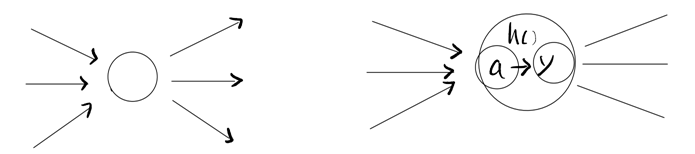

### 3.2 활성화 함수
h()의 활성화 함수를 통해 0, 1로 나타나는 함수를 계단 함수라고 하고 활성화 함수로 사용할 경우 *"퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다."*라 할 수 있다. 

#### 3.2.1 시그모이드 함수
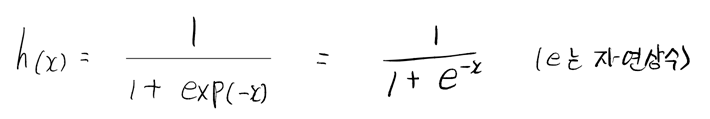
- e는 자연상수로 2.7182 값을 갖는 실수
- 시그모이드 함수에 1.0과 2.0을 입력하면 h(1.0) = 0.731..., h(0.2) = 0.880... 처럼 특정 값을 출력
- 지금까지 퍼셉트론과 신경망의 주된 차이는 활성화 함수의 유무이다.

#### 3.2.2 계단 함수 구현
- 계단 함수는 아래 코드와 같이 입력이 0을 넘으면 1을 출력하고 그 외에는 0을 출력하는 함수로 표현

In [2]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
print('x값이 0보다 클 경우 : ',step_function(1))
print('x값이 0보다 작을 경우 : ',step_function(-1))

x값이 0보다 클 경우 :  1
x값이 0보다 작을 경우 :  0


위 코드의 단점은 단순 실수만 적용이 가능하다. 행렬 형태를 가진 넘파이 배열을 인수로 넣을 수는 없다.

In [3]:
import numpy as np
x= np.array([1,2])
step_function(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

위 문제를 해결하기 위해 아래와 같이 수정

In [5]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)
print('x값이 0보다 클 경우 : ',step_function(1))
print('x값이 0보다 작을 경우 : ',step_function(-1))
print('x값이 행렬인 경우 : ',step_function(x))

x값이 0보다 클 경우 :  1
x값이 0보다 작을 경우 :  0
x값이 행렬인 경우 :  [1 1]


- 위 와 같은 코드가 넘파이 배열을 인식하는 경우는 넘파이의 특징을 이용한 것이다.
- 넘파이는 배열에 부등호 연산이 가능
    - 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성
    - 아래 예시에서는 x의 원소 각각이 0보다 크면 True 아니면 False로 변환하는 새로운 y가 생성
    - bool배열이 아닌 0 or 1 인 int형으로 출력하고 싶을 땐 bool --> int로 전환한다.

In [6]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x>0
print(y)
y= y.astype(np.int)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


#### 3.2.3 계단 함수의 그래프

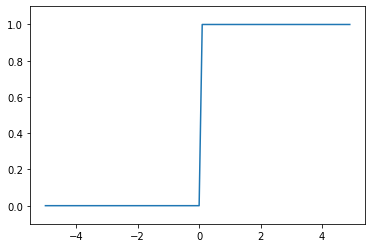

In [7]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

#### 3.2.4 시그모이드 함수

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


넘파이의 브로드캐스트에 따라 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것이다.

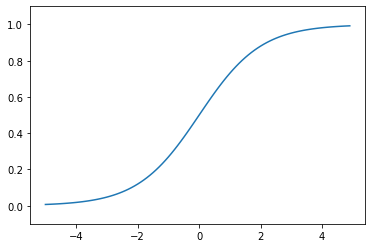

In [13]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.5 시그모이드 함수와 계단 함수 비교
차이점
- 시각적으로 먼저 보이는 차이는 '매끄러움'이다. 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다. 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버린다. 
- 계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려준다는 점도 다르다. 다시 말해 퍼셉트론에서 뉴런이 0 or 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.

공통점
- 둘 다 입력이 작을 때의 출력은 0에 가깝고 입력이 크면 1에 가까워지는 구조
- 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력
- 입력이 아무리 작거나 커도 출력은 0~1 사이라는 것

#### 3.2.6 비선형 함수
- 시그모이드 함수나 계단 함수는 비선형 함수로 분류된다.
- 신경망에서 활성화 함수로 비선형 함수를 사용해야 하는데 선형을 사용하지 않는 이유는 신경망의 층을 깊에 하는 의미가 없어지기 때문이다.
- 선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.


선형 함수인 h(x)=cx를 활성화 함수로 사용한 3층 네트워트를 떠올려 보면 y(x) = h(h(h(x)))가 되고 y(x) = c*c*c*x처럼 곱셈을 수행한다. 이 처럼 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다. 그래서 반드시 비선형을 사용

#### 3.2.7 ReLU 함수
이 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수

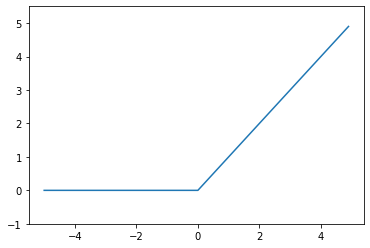

In [15]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

여기서 넘파이의 maximum 함수를 사용했는데 두 입력 값 중 큰 값을 선택해 반환하는 함수이다.

### 3.3 다차원 배열의 계산
다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현가능

#### 3.3.1 다차원 배열
다차원 배열도 기본은 **'숫자의 집합'**이다, 숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것, 3차원으로 늘어 놓은 것이나 N차원으로 나열하는 것을 통틀어 다차원 배열이라고 한다.

In [16]:
A = np.array([1,2,3,4])
print(A)
#차원 출력
print(np.ndim(A))
# 배열 출력
print(A.shape)
#0번째 원소 개수 출력
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [17]:
B = np.array([[1,2], [3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


#### 3.3.2 행렬의 곱
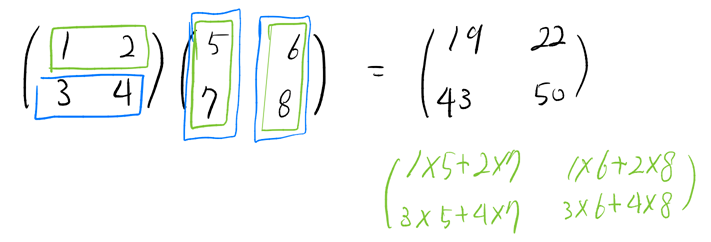

In [18]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(np.dot(A,B))

[[19 22]
 [43 50]]


행렬 곱에서는 대응하는 차원 원소의 수를 일치시켜야 한다.

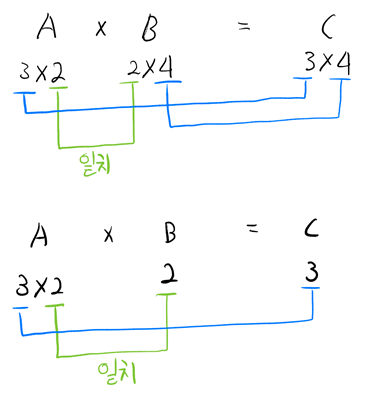

In [19]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)
print(np.dot(A,B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [20]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


#### 3.3.3 신경망에서의 행렬 곱
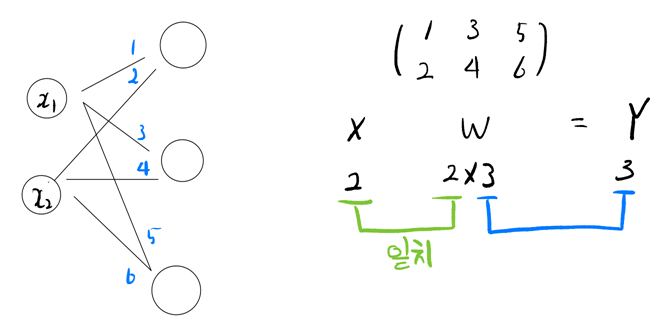

In [21]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


행렬곱을 할 때 단번에 결과를 계산해주는 기능은 신경망을 구현할 때 매우 중요하다고 할 수 있다.

### 3.4 3층 신경망 구현하기
앞서 공부한 행렬곱을 통해 3층 신경망에서 수행되는 입력부터 출력까지의 처리를 구현, 이를 위해 넘파이 다차원 배열을 사용한다. 넘파이 배열을 잘 쓰면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다.

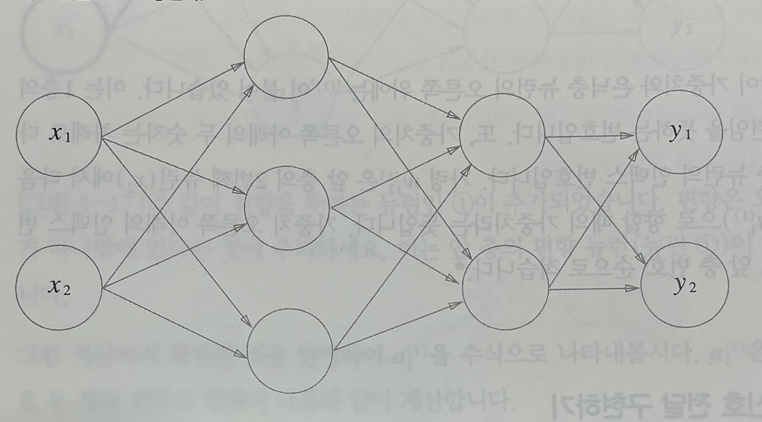

#### 3.4.1 표기법 설명
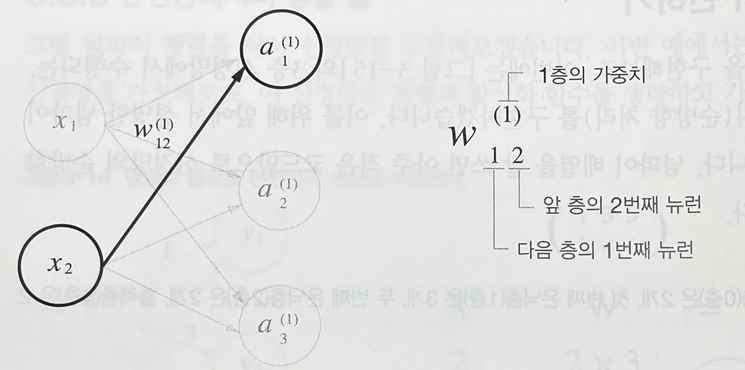

#### 3.4.2 각 층의 신호 전달 구현하기
1층의 첫 번째 뉴런으로 가는 신호 예시
- 그림에 편향 b가 추가 되었다. 편향은 0층에서 1층으로 가는 1번의 상황만 있어서 b1으로 표기한다.
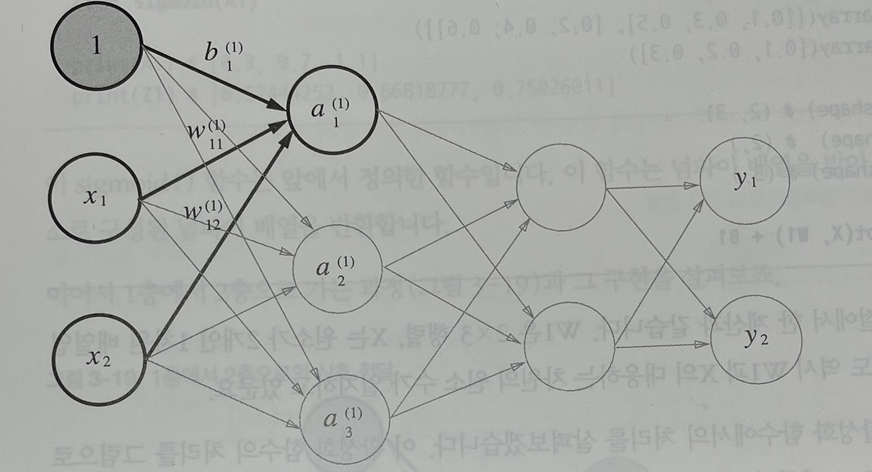

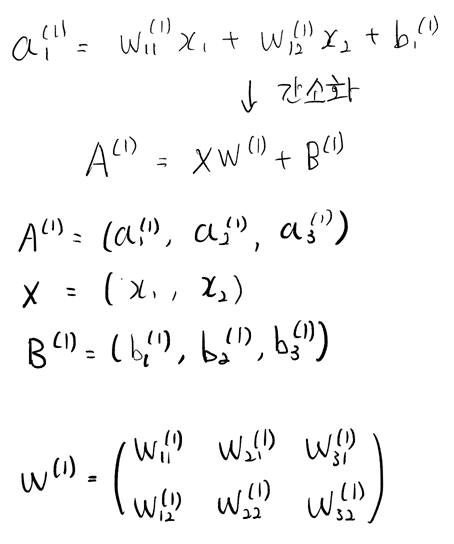

In [23]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


1층에 활성화 함수 처리
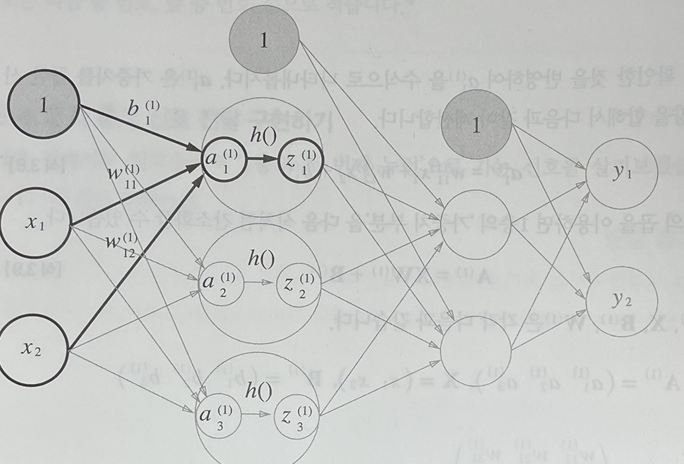

In [24]:
Z1= sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


#### 1층 -->2층으로 가는 과정 구현
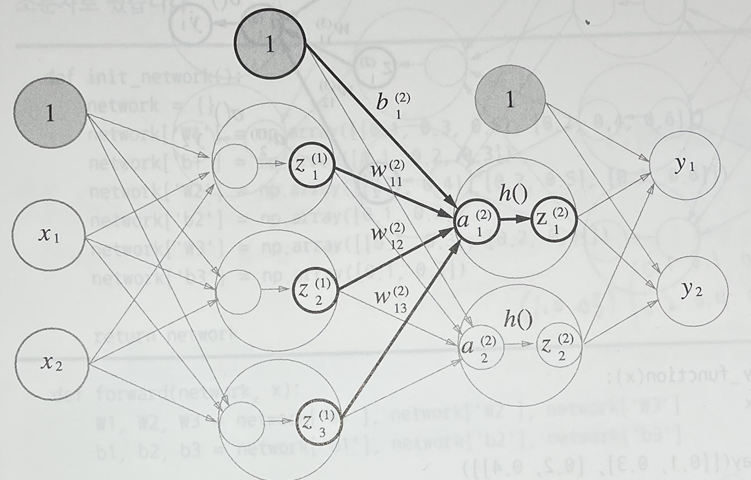

In [26]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W1.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(2, 3)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


#### 2층에서 --> 출력층 구현
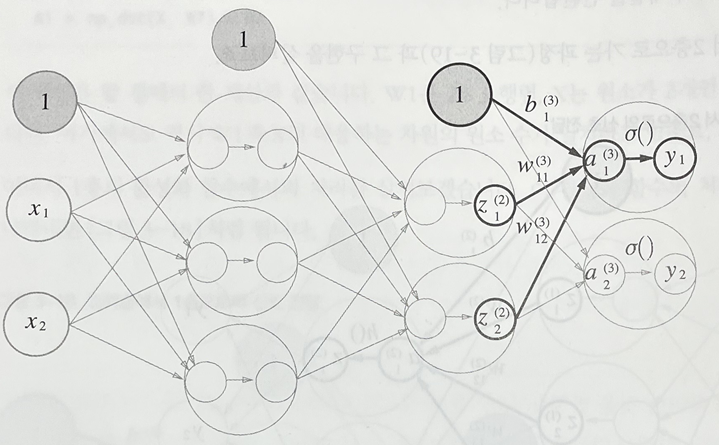

In [27]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


여기서는 활성화 함수로 항등함수를 이용하여 입력을 그대로 출력을 했다. 

#### 3.4.3 구현 정리

In [29]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([0.1, 0.5])
y = forward(network, x)
print(y)

[0.31234736 0.6863161 ]


함수 이름이 forward인 것은 순방향으로 전달됨을 알리기 위함이다. 앞으로 역방향 처리에 대해서도 살필 예정